<a href="https://colab.research.google.com/github/emna22hmd/CognoRise-InfoTech/blob/main/Diabetes_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Diabetes Prediction, the last task**

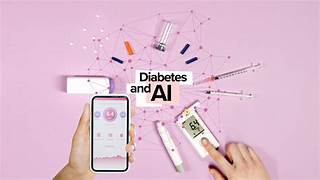

● Algorithm: Random Forest Classifier, K-Nearest Neighbors (KNN), adaboosting
classifier,linear Regression, Decision Tree Classifier.

● Description: Predict whether a person has diabetes or not using features like
glucose levels and BMI.

# **About the Dataset**

The **Diabetes prediction dataset** is a collection of medical and demographic data from patients, along with their diabetes status (positive or negative). The data includes features such as age, gender, body mass index (BMI), hypertension, heart disease, smoking history, HbA1c level, and blood glucose level. This dataset can be used to build **machine learning models** to predict diabetes in patients based on their medical history and demographic information. This can be useful for healthcare professionals in identifying patients who may be at risk of developing diabetes and in developing personalized treatment plans. Additionally, the dataset can be used by researchers to explore the relationships between various medical and demographic factors and the likelihood of developing diabetes.


Dataset Link: https://www.kaggle.com/datasets/iammustafatz/diabetes-prediction-dataset

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.metrics import precision_score, recall_score, confusion_matrix, classification_report, accuracy_score, f1_score
from sklearn import metrics
from sklearn.neighbors import KNeighborsClassifier
import numpy as np
from sklearn.metrics import confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression
from sklearn import linear_model
from sklearn.metrics import mean_absolute_error, mean_absolute_percentage_error, mean_squared_error

# **Data Reading and Analysing**

In [ ]:
! unzip Diabetes_Prediction_Data.zip

Archive:  Diabetes_Prediction_Data.zip
  inflating: diabetes_prediction_dataset.csv  


In [ ]:
data = pd.read_csv('/content/diabetes_prediction_dataset.csv')
data.head()

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,Female,80.0,0,1,never,25.19,6.6,140,0
1,Female,54.0,0,0,No Info,27.32,6.6,80,0
2,Male,28.0,0,0,never,27.32,5.7,158,0
3,Female,36.0,0,0,current,23.45,5.0,155,0
4,Male,76.0,1,1,current,20.14,4.8,155,0


In [ ]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
age,100000.0,41.885856,22.516840,0.08,24.00,43.00,60.00,80.00
hypertension,100000.0,0.074850,0.263150,0.00,0.00,0.00,0.00,1.00
heart_disease,100000.0,0.039420,0.194593,0.00,0.00,0.00,0.00,1.00
bmi,100000.0,27.320767,6.636783,10.01,23.63,27.32,29.58,95.69
HbA1c_level,100000.0,5.527507,1.070672,3.50,4.80,5.80,6.20,9.00
blood_glucose_level,100000.0,138.058060,40.708136,80.00,100.00,140.00,159.00,300.00
diabetes,100000.0,0.085000,0.278883,0.00,0.00,0.00,0.00,1.00


In [ ]:
import seaborn as sns

In [ ]:
y = data.diabetes
Y, N = y.value_counts()
print('Number of diabetic: ',Y)
print('Number of non diabetic : ',N)

Number of diabetic:  91500
Number of non diabetic :  8500


In [ ]:
feature_columns = ['gender',	'age',	'hypertension',	'heart_disease',	'smoking_history', 'bmi', 'HbA1c_level',	'blood_glucose_level']
x = data[feature_columns]
y = data.diabetes

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=0)

# **Preprocessing**

In [ ]:
from sklearn.preprocessing import LabelEncoder

# Initialize LabelEncoder
le = LabelEncoder()

# Fit and transform the 'gender' column in both training and testing data
X_train['gender'] = le.fit_transform(X_train['gender'])
X_test['gender'] = le.transform(X_test['gender'])

In [ ]:
# Apply LabelEncoder to the 'smoking_history' column
X_train['smoking_history'] = le.fit_transform(X_train['smoking_history']) # Encode 'smoking_history' for training data
X_test['smoking_history'] = le.transform(X_test['smoking_history']) # Encode 'smoking_history' for testing data

# **Random Forest Classifier**

In [ ]:
clf = RandomForestClassifier(max_depth=2, random_state=42)
clf.fit(X_train, y_train)
accuracy = clf.score(X_train, y_train)
print("Accuracy:", accuracy)

Accuracy: 0.9313857142857143


In [ ]:
#Testing the Model on test set
predictions=clf.predict(X_test)
acccuracy= accuracy_score(y_test,predictions)
acccuracy

0.9314

In [ ]:
print(classification_report(y_test,clf.predict(X_test)))

              precision    recall  f1-score   support

           0       0.93      1.00      0.96     27461
           1       1.00      0.19      0.32      2539

    accuracy                           0.93     30000
   macro avg       0.97      0.59      0.64     30000
weighted avg       0.94      0.93      0.91     30000



# **K-Nearest Neighbors (KNN)**

In [ ]:
knn=KNeighborsClassifier(n_neighbors=1)
knn.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=1)

<Axes: >

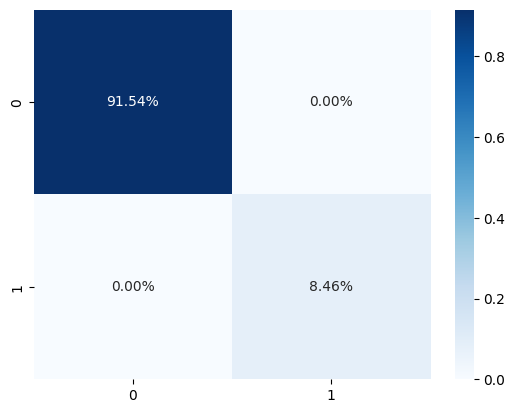

In [ ]:
_pred = knn.predict(X_test)
confusion_knn=confusion_matrix(y_test,y_test)
sns.heatmap(confusion_knn/np.sum(confusion_knn), annot=True, fmt='.2%', cmap='Blues')

In [ ]:
print(classification_report(y_test,knn.predict(X_test)))

              precision    recall  f1-score   support

           0       0.96      0.97      0.97     27461
           1       0.66      0.61      0.63      2539

    accuracy                           0.94     30000
   macro avg       0.81      0.79      0.80     30000
weighted avg       0.94      0.94      0.94     30000



**Tuning the hyper-parameters: Finding the best k value by testing**

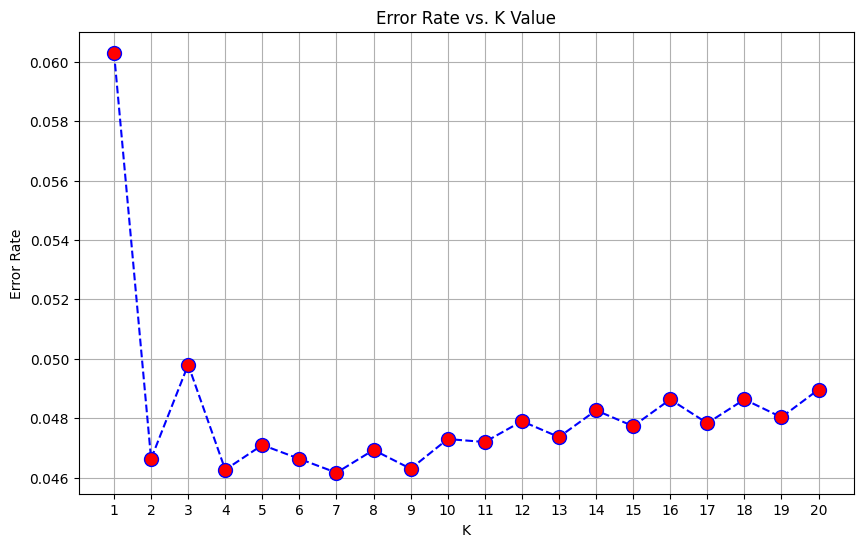

Best value of k: 7


In [ ]:
error_rate = []
for k in range(1, 21):  # Testing k from 1 to 20
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    error_rate.append(np.mean(y_pred != y_test))

# Plotting the elbow curve
plt.figure(figsize=(10, 6))
plt.plot(range(1, 21), error_rate, color='blue', linestyle='dashed', marker='o', markerfacecolor='red', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')
plt.xticks(range(1, 21))
plt.grid(True)
plt.show()


# Choosing the best k value with the lowest error rate
best_k = np.argmin(error_rate) + 1
print(f"Best value of k: {best_k}")

**Cross Validation**

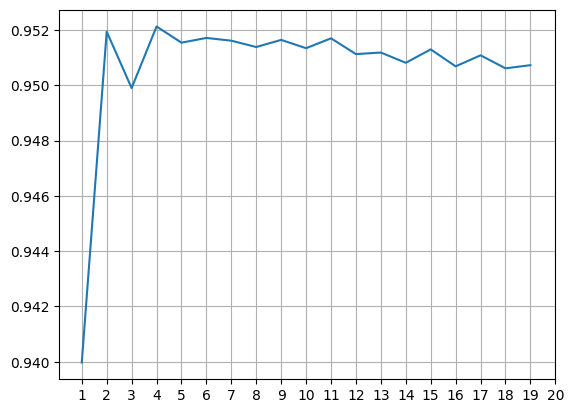

In [ ]:
knn_scores=[]
for k in range(1,20):
    knn1=KNeighborsClassifier(n_neighbors=k)
    scores=cross_val_score(knn1,X_train,y_train,cv=5)
    knn_scores.append(scores.mean())

x_ticks = [1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20]
x_labels = x_ticks

plt.plot([k for k in range(1,20)],knn_scores)
plt.xticks(ticks=x_ticks, labels=x_labels)
plt.grid()

# **adaboosting classifier**

In [ ]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier

In [ ]:
AdaBoostClassifier().get_params()

{'algorithm': 'SAMME.R',
 'base_estimator': 'deprecated',
 'estimator': None,
 'learning_rate': 1.0,
 'n_estimators': 50,
 'random_state': None}

In [ ]:
ada=AdaBoostClassifier(random_state=42, base_estimator = DecisionTreeClassifier(), learning_rate = 1.0, n_estimators=200)
ada.fit(X_train,y_train)
y_pred_ada=ada.predict(X_test)

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


<Axes: >

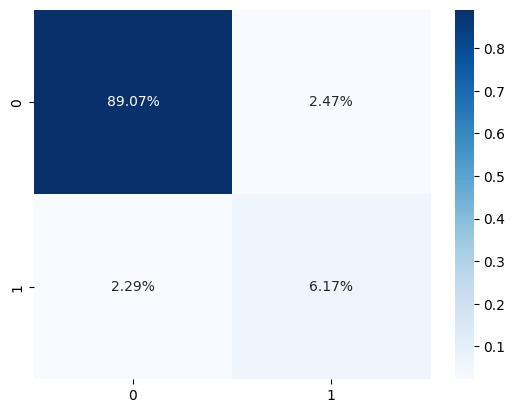

In [ ]:
confusion_ada=confusion_matrix(y_test,ada.predict(X_test))
sns.heatmap((confusion_ada/np.sum(confusion_ada)),annot=True,fmt='.2%', cmap='Blues')

In [ ]:
print(classification_report(y_test,y_pred_ada))

              precision    recall  f1-score   support

           0       0.97      0.97      0.97     27461
           1       0.71      0.73      0.72      2539

    accuracy                           0.95     30000
   macro avg       0.84      0.85      0.85     30000
weighted avg       0.95      0.95      0.95     30000



# **Linear Regression**

In [ ]:
model = LinearRegression()
model.fit(X_train,y_train)
y_pred = model.predict(X_test)

MAE

In [ ]:
mean_absolute_error(y_test,y_pred)

0.15463508334202164

MSE

In [ ]:
mean_squared_error(y_test,y_pred)

0.05091214598103132

**Cross validation for linear regression**

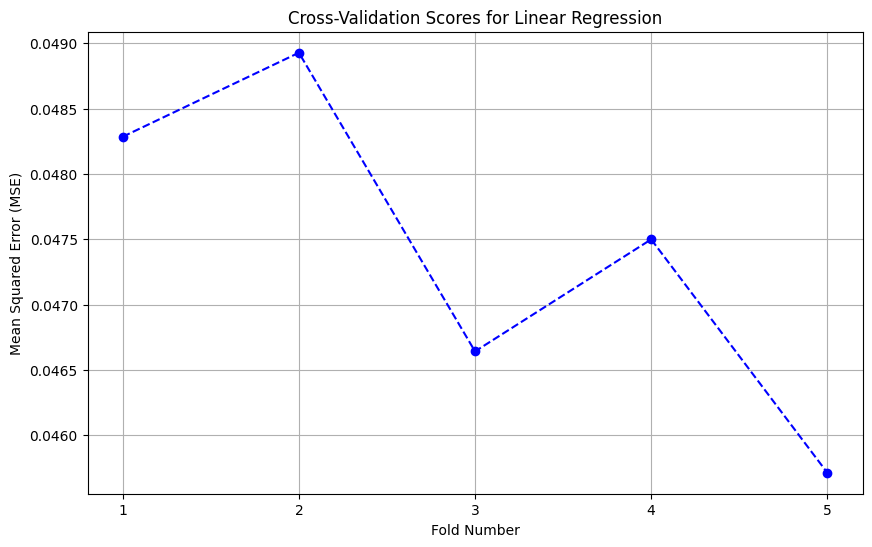

In [ ]:
# Perform cross-validation
cv_scores = cross_val_score(model, X_train, y_train, cv=5, scoring='neg_mean_squared_error')

# Convert negative MSE to positive
cv_scores = np.abs(cv_scores)

# Plotting the cross-validation scores
plt.figure(figsize=(10, 6))
plt.plot(range(1, len(cv_scores) + 1), cv_scores, marker='o', linestyle='--', color='b')
plt.title('Cross-Validation Scores for Linear Regression')
plt.xlabel('Fold Number')
plt.ylabel('Mean Squared Error (MSE)')
plt.xticks(range(1, len(cv_scores) + 1))
plt.grid(True)
plt.show()

# **Decision Tree Classifier**

In [ ]:
from sklearn.tree import DecisionTreeClassifier

# Initialize the DecisionTreeClassifier with default parameters
dtc = DecisionTreeClassifier()

# Fit the model to the training data
dtc.fit(X_train, y_train)

DecisionTreeClassifier()

In [ ]:
print("On train set: ",accuracy_score(y_train, dtc.predict(X_train)))

dtc_acc = accuracy_score(y_test, dtc.predict(X_test))
print("On test set: ",dtc_acc)

On train set:  0.9992428571428571
On test set:  0.9497333333333333


In [ ]:
y_pred_dtc=dtc.predict(X_test)
print(classification_report(y_test,y_pred_dtc))

              precision    recall  f1-score   support

           0       0.98      0.97      0.97     27461
           1       0.69      0.73      0.71      2539

    accuracy                           0.95     30000
   macro avg       0.83      0.85      0.84     30000
weighted avg       0.95      0.95      0.95     30000



<Axes: >

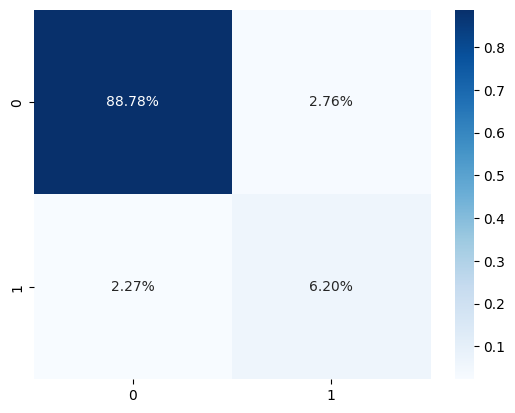

In [ ]:
y_pred = dtc.predict(X_test)
confusion_matrix=confusion_matrix(y_test,y_pred)
sns.heatmap(confusion_matrix/np.sum(confusion_matrix), annot=True, fmt='.2%', cmap='Blues')

# **Evaluating models**

In [ ]:
models = {
    "Random Forest": clf,
    "KNN": knn,
    "AdaBoost": ada,
    "Linear Regression": model,
    "Decision Tree Classifier": dtc,
}

# Replace 'y_true' with your actual labels
y_true = y_test

# Dictionary to store the results
results = {
    "Model": [],
    "Accuracy": [],
    "Precision": [],
    "F1 Score (Macro)": []

}

# Evaluate each model
for name, model in models.items():
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_true, y_pred)
    precision = precision_score(y_true, y_pred)
    f1_macro = f1_score(y_true, y_pred, average='macro')

    # Append each result to the dictionnary
    results["Model"].append(name)
    results["Accuracy"].append(accuracy)
    results["Precision"].append(precision)
    results["F1 Score (Macro)"].append(f1_macro)


# Create a DataFrame to display the results
results_df = pd.DataFrame(results)

# Display the table
print(results_df)


                      Model  Accuracy  Precision  F1 Score (Macro)
0             Random Forest  0.931400   1.000000          0.641213
1                       KNN  0.953833   0.904062          0.813076
2                  AdaBoost  0.952367   0.714120          0.847726
3         Linear Regression  0.949733   0.691850          0.841956
4  Decision Tree Classifier  0.949733   0.691850          0.841956


**KNN** is the leading model **in terms of accuracy**, achieving the highest score of **95.38%**. However, while **Random Forest** boasts perfect **precision**, its F1 Score is relatively lower, indicating it might be overfitting on certain classes. AdaBoost, with the highest **F1 Score (Macro)** of **0.847726**, suggests a better balance between precision and recall across all classes.

Therefore, **AdaBoost** could be the considered the most **balanced**